In [1]:
!pip install ipython-autotime
%load_ext autotime

time: 2.38 ms (started: 2021-03-27 12:52:57 +00:00)


In [2]:
!pip install bing-image-downloader

time: 3.04 s (started: 2021-03-27 12:53:47 +00:00)


In [3]:
!mkdir images

time: 127 ms (started: 2021-03-27 12:54:16 +00:00)


In [4]:
from bing_image_downloader import downloader
downloader.download("human person",limit=500,output_dir='images',
                    adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 12 Images on Page 1.


[%] Downloading Image #1 from https://www.gotquestions.org/img/OG/hypostatic-union.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://decentfilms.com/uploads/articles/catholicism-and-horror.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://www.ucg.org/system/storage/serve/101121/why-do-i-struggle-with-sins-ive-repented-of-how-can-i-overcome-sins.jpg?itok=pmXTLlff
[%] File Downloaded !

[%] Downloading Image #4 from https://1.bp.blogspot.com/-8uqeP8smf8Y/UYTYCf2p5_I/AAAAAAAAA4Y/B05RIPSLTBk/s640/Robert+Wadlow+(13).jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://www.cgstudio.com/imgd/l/8/59500d48a70248bb078b4567/5237-albert-einstein.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://assets.teenvogue.com/photos/5a33c2d5f01b6d6b153e994e/master/w_400%2Cc_limit/1217-TV-GGDB30-01.jpg
[%] File Downloaded !

[%] Downloading Image #7 from http://www.supernaturalwiki.com/images/thum

In [5]:
from bing_image_downloader import downloader
downloader.download("dogs",limit=500,output_dir='images',
                    adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 12 Images on Page 1.


[%] Downloading Image #1 from http://www.seenox.org/wp-content/uploads/2014/03/Naughty-Dogs-20.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://cdn.curiousdoodle.com/wp-content/uploads/2020/05/dogspottingsociety011.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://historiascomvalor.com/wp-content/uploads/2018/01/pastores-alemaes-14-760x1136.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://tranquilmonkey.com/wp-content/uploads/2014/07/funny-underwater-dog-photos-14.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://www.recreoviral.com/wp-content/uploads/2015/05/animales-con-mutaciones-11-730x548.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://www.sunnyskyz.com/uploads/2014/07/os6om-dogs-eat-bees7.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://petpress.net/wp-content/uploads/2019/11/cocker-spaniel-15.jpg
[%] File Downloaded !

[%] Down

In [6]:
from bing_image_downloader import downloader
downloader.download("bird",limit=500,output_dir='images',
                    adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 12 Images on Page 1.


[%] Downloading Image #1 from https://4kwallpapers.com/images/wallpapers/harley-quinn-birds-of-prey-margot-robbie-dc-comics-2020-1080x1920-2195.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.artdemasque.com.au/img/gallery/bodypaint/LeopardCrouching.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://auchterphotography.com/wp-content/uploads/2013/11/Tropical-Birds-4988.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://whereintokyo.com/pix/800/800-bunkyo-stmarys5.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://i.pinimg.com/736x/3f/37/52/3f3752abb52e5789eda477acc798bab8--exhibition-english.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://hative.com/wp-content/uploads/2014/05/edible-arrangements/9-funny-face-food-arrangement.jpg
[%] File Downloaded !

[%] Downloading Image #7 from http://myamazingthings.com/wp-content/uploads/2017/06/watering-can-with

In [8]:
# Preprocessing
# 1. Resize
# 2. Flatten

import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = '/content/images'
CATEGORIES = ['human person','dogs','bird']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category) # Label Encoding the values
  path = os.path.join(DATADIR,category) # Create path to use all the images
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    #print(img_array.shape)
    #plt.imshow(img_array)
    img_resized = resize(img_array,(150,150,3)) # Normalizes the value from 0 to 1
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

time: 5min 19s (started: 2021-03-27 13:12:07 +00:00)


In [9]:
# Split data into Training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,
                                  test_size=0.3,random_state=1600)

time: 620 ms (started: 2021-03-27 13:18:24 +00:00)


In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 50min 23s (started: 2021-03-27 14:03:04 +00:00)


In [12]:
y_pred = clf.predict(x_test)
y_pred


array([0, 0, 2, 0, 2, 2, 1, 2, 1, 0, 1, 1, 2, 2, 2, 2, 0, 1, 0, 1, 0, 0,
       2, 0, 2, 0, 1, 1, 2, 1, 0, 2, 0, 2, 1, 1, 0, 0, 2, 2, 0, 1, 0, 2,
       1, 2, 2, 1, 0, 0, 1, 1, 2, 0, 2, 1, 1, 0, 0, 1, 2, 1, 0, 1, 2, 0,
       0, 1, 0, 2, 2, 0, 0, 0, 1, 1, 0, 1, 0, 2, 0, 2, 0, 1, 1, 2, 0, 0,
       2, 0, 0, 0, 1, 0, 0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 0, 1, 1,
       1, 1, 0, 2, 2, 1, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 0, 0, 2, 2,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 2, 1, 2, 1, 2, 2, 0, 2, 1, 0, 0, 0, 1,
       0, 1, 1, 2, 0, 2, 2, 2, 2, 1, 0, 2, 1, 1, 1, 2, 1, 2, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 0, 2, 1, 1, 0,
       0, 0, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 1,
       1, 1, 2, 0, 2, 1, 0, 2, 0, 2, 2, 2, 2, 1, 1, 0, 2, 1, 0, 0, 0, 0,
       2, 2, 2, 1, 2, 2, 1, 0, 0, 2, 2, 1, 0, 0, 0, 2, 0, 0, 1, 0, 2, 1,
       1, 1, 2, 1, 2, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 2, 0, 1, 1, 2, 2, 1,
       0, 1, 2, 2, 0, 1, 2, 1, 1, 0, 0, 2, 2, 2, 2,

time: 5.22 s (started: 2021-03-27 14:54:52 +00:00)


In [13]:
y_test

array([0, 0, 2, 0, 2, 2, 1, 2, 1, 0, 1, 1, 2, 2, 2, 2, 0, 1, 0, 1, 0, 0,
       2, 0, 2, 0, 1, 1, 2, 1, 0, 2, 0, 2, 1, 1, 0, 1, 2, 2, 0, 1, 0, 2,
       1, 2, 2, 1, 0, 0, 1, 1, 2, 0, 2, 1, 1, 0, 0, 1, 2, 1, 0, 1, 2, 0,
       0, 1, 0, 2, 2, 0, 0, 0, 1, 1, 0, 1, 0, 2, 0, 2, 0, 1, 1, 2, 0, 0,
       2, 0, 0, 0, 1, 0, 0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 0, 1, 1,
       1, 1, 0, 2, 2, 1, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 0, 0, 2, 2,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 2, 1, 2, 1, 2, 2, 0, 2, 1, 0, 0, 0, 1,
       0, 1, 1, 2, 0, 2, 2, 2, 2, 1, 0, 2, 1, 1, 1, 2, 1, 2, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 0, 2, 1, 1, 0,
       0, 0, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 2, 2, 1,
       1, 1, 2, 0, 2, 1, 0, 2, 0, 2, 2, 2, 2, 1, 1, 0, 2, 1, 0, 0, 0, 0,
       2, 2, 2, 1, 2, 2, 1, 0, 0, 2, 2, 1, 0, 0, 0, 2, 0, 0, 1, 0, 2, 1,
       1, 1, 2, 1, 2, 1, 0, 0, 1, 0, 0, 0, 2, 0, 1, 2, 0, 1, 1, 2, 2, 1,
       0, 1, 2, 2, 0, 1, 2, 1, 1, 0, 0, 2, 2, 2, 2,

time: 10.7 ms (started: 2021-03-27 14:55:21 +00:00)


In [14]:
from sklearn.metrics import accuracy_score,confusion_matrix

time: 1.92 ms (started: 2021-03-27 14:55:54 +00:00)


In [15]:
accuracy_score(y_pred,y_test)

0.9911111111111112

time: 6.02 ms (started: 2021-03-27 14:56:14 +00:00)


In [16]:
confusion_matrix(y_pred,y_test)

array([[153,   4,   0],
       [  0, 141,   0],
       [  0,   0, 152]])

time: 18.3 ms (started: 2021-03-27 14:56:29 +00:00)


In [17]:
# Save the model using Pickle library
import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 167 ms (started: 2021-03-27 14:57:03 +00:00)


In [18]:
model = pickle.load(open('img_model.p','rb'))

time: 133 ms (started: 2021-03-27 14:57:18 +00:00)


Enter your URLhttps://static.scientificamerican.com/sciam/cache/file/7A715AD8-449D-4B5A-ABA2C5D92D9B5A21_source.png
(1500, 2000, 3)
 PREDICTED OUTPUT: human person


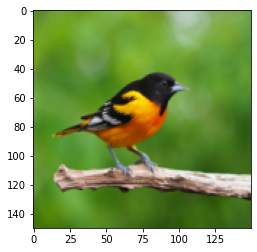

time: 4.39 s (started: 2021-03-27 15:04:38 +00:00)


In [29]:
# Testing a brand new Image
from skimage.io import imread
flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')